In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dateparser
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("typeracer_data.csv",usecols=range(1,7))

In [3]:
df.columns = ['Race','Speed', 'Accuracy','Points', 'Place', 'Date']

In [4]:
df['wpm'] = [int(x.split()[0]) for x in df['Speed']]

In [5]:
df['acc'] = [float(x[:-1]) for x in df['Accuracy']]

In [6]:
df.head()

,Race,Speed,Accuracy,Points,Place,Date,wpm,acc
0,853,58 WPM,94.2%,27.0,4/5,"March 11, 2020",58,94.2
1,852,87 WPM,98.9%,41.0,3/5,"March 11, 2020",87,98.9
2,851,74 WPM,95.3%,30.0,1/5,"March 11, 2020",74,95.3
3,850,74 WPM,95.7%,63.0,4/5,"March 11, 2020",74,95.7
4,849,72 WPM,95.8%,65.0,2/4,"March 11, 2020",72,95.8


In [7]:
df['datetime'] = [dateparser.parse(x) for x in df['Date']]

/home/andrew/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'wpm')

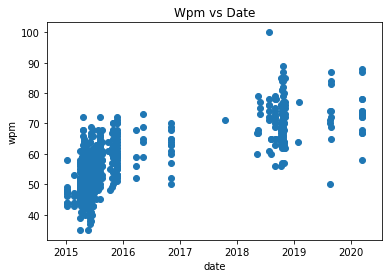

In [8]:
plt.scatter(df['datetime'],df['wpm'])
plt.title("Wpm vs Date")
plt.xlabel("date")
plt.ylabel("wpm")

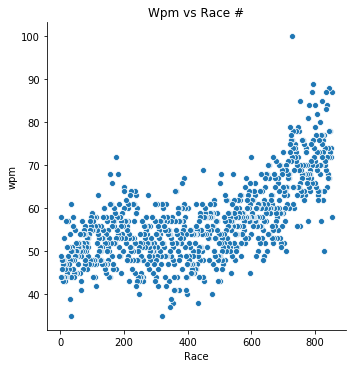

In [9]:
sns.relplot(x='Race',y='wpm',sizes=(15, 200),data=df)
plt.title("Wpm vs Race #")
plt.show()

In [10]:
def to_integer(dt_time):
    return (dt_time.year*31*12 + dt_time.month*31 + dt_time.day) - 2015*(31*12) - 1*31 - 12
print("First date:",list(df['datetime'])[-1])
df['date_int'] = [to_integer(datetime) for datetime in df['datetime']]

First date: 2015-01-12 00:00:00


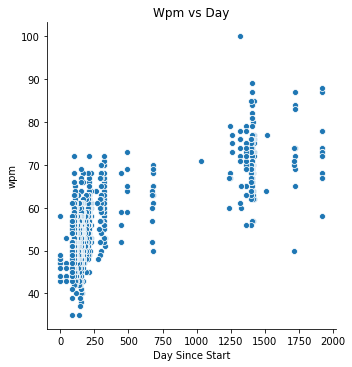

In [11]:
sns.relplot(x='date_int',y='wpm',kind='scatter',data=df)
plt.xlabel("Day Since Start")
plt.title("Wpm vs Day")
plt.show()

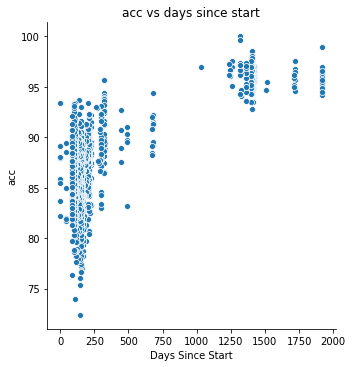

In [12]:
sns.relplot(x='date_int',y='acc',kind='scatter',data=df)
plt.title("acc vs days since start")
plt.xlabel("Days Since Start")
plt.show()

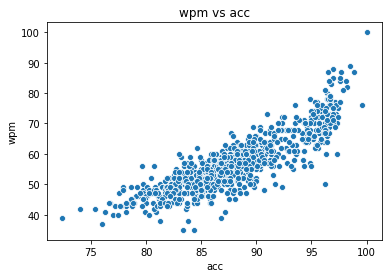

In [29]:
sns.scatterplot(x='acc',y='wpm',data=df)
plt.title("wpm vs acc")
plt.show()

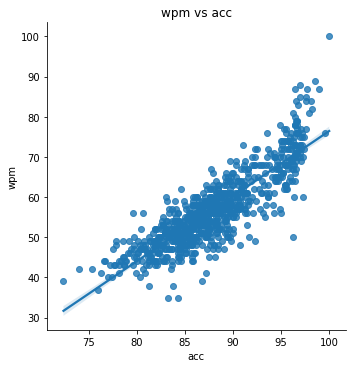

Slope: 0.6494
So every 10 percent increase in accuracy increased my wpm by 6.5
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    wpm   No. Observations:                  853
Model:                            GLM   Df Residuals:                      852
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                          45.983
Method:                          IRLS   Log-Likelihood:                -2842.6
Date:                Wed, 10 Jun 2020   Deviance:                       39177.
Time:                        23:04:19   Pearson chi2:                 3.92e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

In [22]:
linear_plot = sns.lmplot(x='acc',y='wpm',data=df)
plt.title("wpm vs acc")
plt.show()

print("Slope: 0.6494")
print("So every 10 percent increase in accuracy increased my wpm by 6.5")
gamma_model = sm.GLM(df['wpm'],df['acc'])

gamma_results = gamma_model.fit()
print(gamma_results.summary())


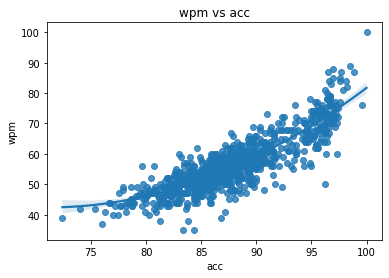

                            OLS Regression Results                            
Dep. Variable:                    wpm   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     1349.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):          1.81e-264
Time:                        22:56:27   Log-Likelihood:                -2504.8
No. Observations:                 853   AIC:                             5016.
Df Residuals:                     850   BIC:                             5030.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.2919     39.850      7.034      0.0

In [15]:
linear_plot = sns.regplot(x='acc',y='wpm',order=2,data=df)
plt.title("wpm vs acc")
plt.show()

polynomial_features= PolynomialFeatures(degree=2)
acc_poly = polynomial_features.fit_transform(np.array(df['acc']).reshape(-1,1))
model = sm.OLS(df['wpm'],acc_poly)
fit_model = model.fit()
print(fit_model.summary())

In [16]:
gamma_model = sm.OLS(df['acc'],df['wpm'])

gamma_results = gamma_model.fit()
print(gamma_results.summary())


                                 OLS Regression Results                                
Dep. Variable:                    acc   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          6.062e+04
Date:                Wed, 10 Jun 2020   Prob (F-statistic):                        0.00
Time:                        22:56:27   Log-Likelihood:                         -3204.9
No. Observations:                 853   AIC:                                      6412.
Df Residuals:                     852   BIC:                                      6416.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [44]:
print(np.array(list(zip(df['date_int'],df['acc']))))

[[1921.    94.2]
 [1921.    98.9]
 [1921.    95.3]
 ...
 [   0.    85.9]
 [   0.    85.5]
 [   0.    93.4]]


In [50]:
model = sm.GLM(df['wpm'],np.array(list(zip(df['acc'],df['date_int']))))
fit_model = model.fit()
print(fit_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    wpm   No. Observations:                  853
Model:                            GLM   Df Residuals:                      851
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          26.852
Method:                          IRLS   Log-Likelihood:                -2612.7
Date:                Wed, 10 Jun 2020   Deviance:                       22851.
Time:                        23:41:01   Pearson chi2:                 2.29e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6081      0.003    231.883      0.0